# Spam classifer with Natural Language processing and Naive Bayes

## Libaries importing

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

from typing import Dict, List
from io import BytesIO
import requests
import tarfile
import glob
import re

## Importing datasets

In [2]:
spam_ham_sms = pd.read_csv("datasets/sms(ham-spam).csv").drop("Unnamed: 0", axis=1)
spam_ham_sms.sample(3)

,labels,messages
2683,ham,I got a call from a landline number. . . I am ...
575,ham,Nope i waiting in sch 4 daddy...
443,ham,Oic... I saw him too but i tot he din c me... ...


In [24]:
def extract_spam_data():
    Base_url = "https://spamassassin.apache.org/old/publiccorpus"

    files = ["20021010_easy_ham.tar.bz2",
             "20021010_hard_ham.tar.bz2",            
             "20021010_spam.tar.bz2"]

    Output_dir = "datasets/emailSpam"

    for filename in files:
        content = requests.get(f"{Base_url}/{filename}").content
        fin = BytesIO(content)

        with tarfile.open(fileobj=fin, mode='r:bz2') as tf:
            tf.extractall(Output_dir)

    return files

In [25]:
files = extract_spam_data()

In [59]:
path = "datasets\emailSpam\*\*"

full_data:List[Dict] = []

for filename in glob.glob(path):
    spamOrham = "spam" in filename
    if spamOrham:
        with open(filename, errors='ignore') as files:
            for line in files:
                if line.startswith("Subject:"):
                    subject = line.lstrip("Subject: ")
                    data = {"labels": "spam", "messages": subject}
                    full_data.append(data)

In [60]:
spam_ham_email = pd.DataFrame(data = full_data, columns=['labels', 'messages'])
spam_ham_email.sample(3)

,labels,messages
190,spam,A better investment than the stock market.\n
374,spam,[ILUG] HELLO\n
298,spam,Membership Renewal\n


In [61]:
data = pd.concat([spam_ham_email, spam_ham_sms])

### Visualising data -> Balance or not

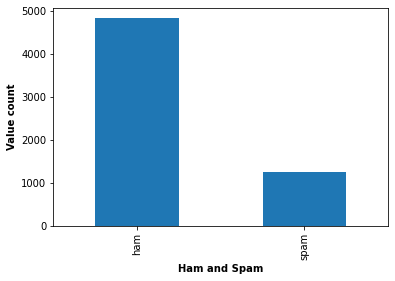

In [62]:
pd.value_counts(data['labels']).plot.bar()
plt.ylabel("Value count", weight='bold')
plt.xlabel("Ham and Spam", weight='bold')
plt.show()